In [4]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
big_df = pd.read_csv('big_df_clean.csv')

# Preprocessing

- Will not consider DATE anymore, as all the data are within a few months only, so all transactions are relatively recent.

In [6]:
big_df.head()

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,GENDER,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,MALE,...,MOBILE,BILLS PAYMENT,2619.191451,5.0,SA,HUMAN,1626.116225,17.0,MOBILE,HUMAN
1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,FEMALE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,MALE,...,WEB,E-WALLET,3349.209339,4.0,SA,HUMAN,NaN,NaN,NaN,NaN
3,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,MALE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,FEMALE,...,WEB,E-WALLET,3886.745466,4.0,SA,CAT,NaN,NaN,NaN,NaN


In [7]:
cols = [print(i) for i in big_df.columns]

CUST_NUM
PROVINCE
REGION
EDUCATION
AGE
TENURE
BUSINESS_OWNER
DIGITAL_FLAG
INCOME_SOURCE
GENDER
MARITAL_STATUS
CREDIT_MEAN
CREDIT_COUNT
CREDIT_CHANNEL
CREDIT_MERCH_GROUP
DEBIT_MEAN
DEBIT_COUNT
DEBIT_CHANNEL
DIGITAL_MEAN
DIGITAL_COUNT
DIGITAL_CHANNEL
DIGITAL_TRAN_TYPE
INCOMING_MEAN
INCOMING_COUNT
INCOMING_BPI_ACCT_TYPE
INCOMING_SRC_BANK_NAME
OUTGOING_MEAN
OUTGOING_COUNT
OUTGOING_CHANNEL
OUTGOING_RCV_BANK_NAME


In [8]:
big_df.isna().sum()

CUST_NUM                      0
PROVINCE                      0
REGION                        0
EDUCATION                     0
AGE                          22
TENURE                        0
BUSINESS_OWNER                0
DIGITAL_FLAG                  0
INCOME_SOURCE                 0
GENDER                        0
MARITAL_STATUS                0
CREDIT_MEAN               43999
CREDIT_COUNT              43999
CREDIT_CHANNEL            43999
CREDIT_MERCH_GROUP        44010
DEBIT_MEAN                20526
DEBIT_COUNT               20526
DEBIT_CHANNEL             20526
DIGITAL_MEAN              35982
DIGITAL_COUNT             35982
DIGITAL_CHANNEL           35982
DIGITAL_TRAN_TYPE         35982
INCOMING_MEAN             33214
INCOMING_COUNT            33214
INCOMING_BPI_ACCT_TYPE    33214
INCOMING_SRC_BANK_NAME    33214
OUTGOING_MEAN             39912
OUTGOING_COUNT            39912
OUTGOING_CHANNEL          39912
OUTGOING_RCV_BANK_NAME    39912
dtype: int64

In [9]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46142 entries, 0 to 46141
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_NUM                46142 non-null  float64
 1   PROVINCE                46142 non-null  object 
 2   REGION                  46142 non-null  object 
 3   EDUCATION               46142 non-null  object 
 4   AGE                     46120 non-null  float64
 5   TENURE                  46142 non-null  float64
 6   BUSINESS_OWNER          46142 non-null  object 
 7   DIGITAL_FLAG            46142 non-null  object 
 8   INCOME_SOURCE           46142 non-null  object 
 9   GENDER                  46142 non-null  object 
 10  MARITAL_STATUS          46142 non-null  object 
 11  CREDIT_MEAN             2143 non-null   float64
 12  CREDIT_COUNT            2143 non-null   float64
 13  CREDIT_CHANNEL          2143 non-null   object 
 14  CREDIT_MERCH_GROUP      2132 non-null 

### Imputation

In [10]:
big_df['AGE'] = big_df['AGE'].fillna(big_df['AGE'].mean())

for i in big_df.columns[11:]:
    if i.split('_')[-1] in ['MEAN', 'COUNT']:
        big_df[i].fillna(0, inplace=True)
    else:
        big_df[i].fillna('NO_DATA', inplace=True)

In [11]:
big_df

,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,GENDER,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,MALE,...,MOBILE,BILLS PAYMENT,2619.191451,5.0,SA,HUMAN,1626.116225,17.0,MOBILE,HUMAN
1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,FEMALE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,MALE,...,WEB,E-WALLET,3349.209339,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,MALE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,FEMALE,...,WEB,E-WALLET,3886.745466,4.0,SA,CAT,0.000000,0.0,NO_DATA,NO_DATA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46137,14060.827927,SULTAN KUDARAT,REGION XII (SOCCSKSARGEN),MID,34.0,9.916667,N,TRADITIONAL,SALARY,MALE,...,NO_DATA,NO_DATA,4199.578771,2.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
46138,14101.987945,SULTAN KUDARAT,REGION XII (SOCCSKSARGEN),NO_DATA,25.0,2.000000,N,DIGITAL,SALARY,MALE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
46139,11266.634103,OCCIDENTAL MINDORO,MIMAROPA REGION,NO_DATA,30.0,2.750000,N,DIGITAL,SALARY,FEMALE,...,MOBILE,INTERNAL FUNDS TRANSFER,0.000000,0.0,NO_DATA,NO_DATA,8007.010094,21.0,MOBILE,HORSE
46140,8992.043372,OCCIDENTAL MINDORO,MIMAROPA REGION,NO_DATA,53.0,2.916667,N,TRADITIONAL,SALARY,FEMALE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA


In [12]:
big_df.to_csv('big_df_final.csv', index=False)

### Standardizing and One-hot Encoding

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [14]:
dfp = big_df.copy().drop('CUST_NUM', axis=1)

df_num = dfp.select_dtypes(exclude='object')
df_cat = dfp.select_dtypes(include='object')

for c in df_num.columns:
    pt = PowerTransformer() # for skewed
    df_num.loc[:, c] = pt.fit_transform(np.array(df_num[c]).reshape(-1, 1))

# one-hot encoding
df_cat = pd.get_dummies(df_cat)
# combine scaled numerical and categorical dummy variables in a dataframe
dfp_combined = pd.concat([df_num, df_cat], axis=1)
# standardize the data to have a mean of ~0 and a variance of 1
dfp_scaled = StandardScaler().fit_transform(dfp_combined)

### Feature Selection (PCA)
Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

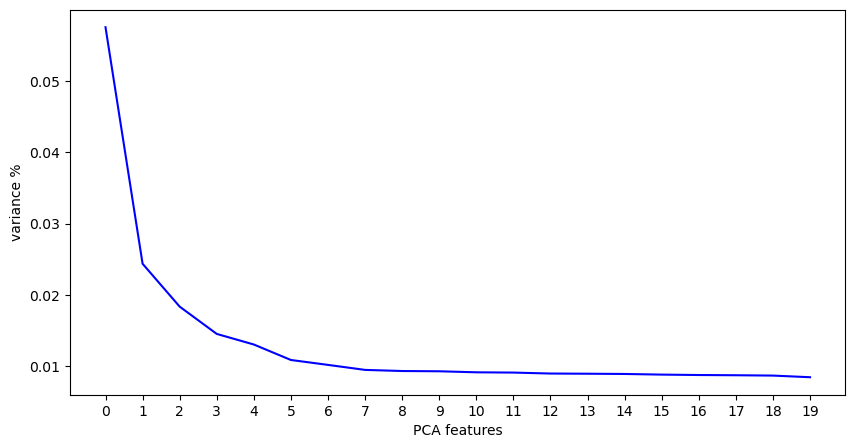

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# principal components
pca = PCA(n_components=20)
res_pca = pca.fit_transform(dfp_scaled)

features = range(pca.n_components_)
plt.figure(figsize=(10,5))
plt.plot(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [16]:
pca = PCA(n_components=5)
res_pca = pca.fit_transform(dfp_scaled)

dfp_pca = pd.DataFrame(res_pca)

In [17]:
dfp_pca.head()

,0,1,2,3,4
0,8.625430,-2.100746,2.628209,-1.100067,-1.170334
1,-2.594756,0.268484,2.098519,1.525933,-1.310542
2,4.424113,-2.622652,-2.792660,4.123529,-0.264524
3,-1.814299,-0.634571,-0.402644,0.004759,-1.606527
4,4.974970,-2.340457,-1.589727,5.091535,-0.567400


# K-Means

Try 2 to 10 clusters

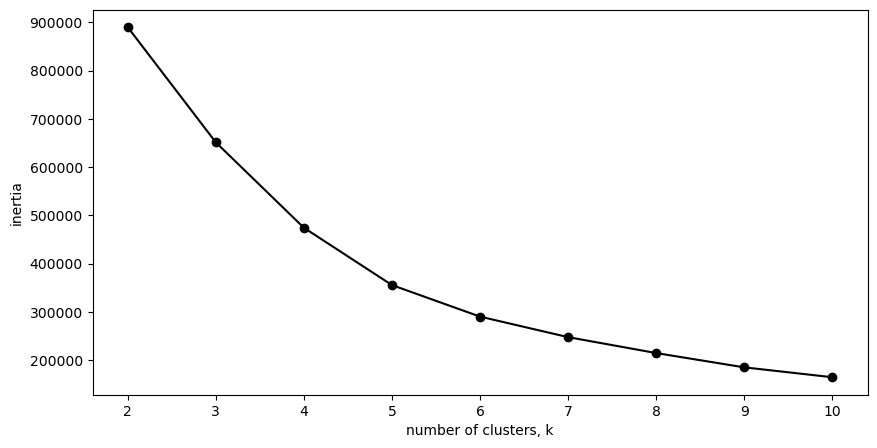

In [29]:
from sklearn.cluster import KMeans

# kMeans with PCA components
ks = range(2,11)
inertias_pca = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(dfp_pca.iloc[:,:])
    
    # Append the inertia to the list of inertias
    inertias_pca.append(model.inertia_)

plt.figure(figsize=(10,5))
plt.plot(ks, inertias_pca, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Get the elbow point (best number of clusters)

In [30]:
from kneed import KneeLocator

# inertia scores: confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concavem will detect knees
inertia_knee = KneeLocator(
        range(2,11), 
        inertias_pca, 
        S=0.1, curve="convex", direction="decreasing")

K_inertia = inertia_knee.elbow   
print("Elbow at k =", f'{K_inertia:.0f} clusters')

Elbow at k = 5 clusters


Get array of cluster labels and insert as new column into the original dataframe

# 

In [31]:
from sklearn.cluster import KMeans

dfp1 = big_df.copy()

model = KMeans(n_clusters=5)
clusters = model.fit_predict(dfp_pca)
dfp1.insert(0, 'CLUSTER', clusters)

dfp1.head()

,CLUSTER,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,1,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,...,MOBILE,BILLS PAYMENT,2619.191451,5.0,SA,HUMAN,1626.116225,17.0,MOBILE,HUMAN
1,0,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,4,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,...,WEB,E-WALLET,3349.209339,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,2,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,4,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,...,WEB,E-WALLET,3886.745466,4.0,SA,CAT,0.000000,0.0,NO_DATA,NO_DATA


In [32]:
dfp1.to_csv('dfp_kmeans2.csv')

Get silhouette score

In [33]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(dfp_pca,clusters)

0.4819760768012011

Visualize

In [24]:
import numpy as np
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(dfp_pca)

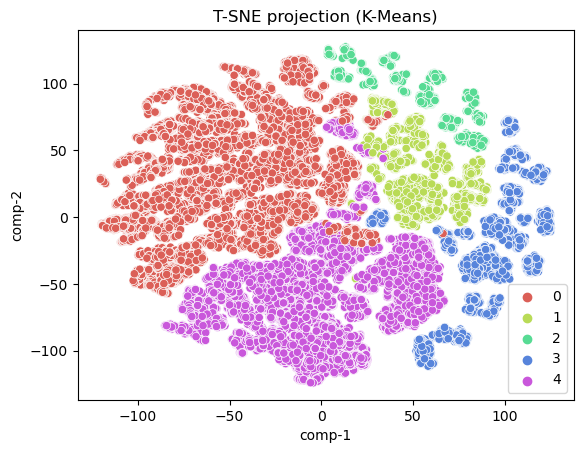

In [25]:
import seaborn as sns

dfp_kmeans = pd.DataFrame()
dfp_kmeans['CLUSTER'] = dfp1['CLUSTER']
dfp_kmeans['comp-1'] = transformed[:,0]
dfp_kmeans['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kmeans.CLUSTER.tolist(),
                palette=sns.color_palette('hls',5),
                data=dfp_kmeans).set(title="T-SNE projection (K-Means)")

plt.savefig('T-SNE_K-Means2.png')
plt.show()

# K-Prototypes
Uses both K-means and K-modes to handle numerical and categorical data respectively.

### Data processing

In [76]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder

In [77]:
dfp = big_df.copy().drop('CUST_NUM', axis=1)

df_num = dfp.select_dtypes(exclude='object')
df_cat = dfp.select_dtypes(include='object')

for c in df_num.columns:
    df_num.loc[:, c] = PowerTransformer().fit_transform(np.array(df_num[c]).reshape(-1, 1))
    df_num.loc[:, c] = StandardScaler().fit_transform(np.array(df_num[c]).reshape(-1, 1))

for c in df_cat.columns:
    df_cat.loc[:, c] = LabelEncoder().fit_transform(np.array(df_cat[c]).reshape(-1, 1))

# combine in a dataframe
dfp_combined = pd.concat([df_num, df_cat], axis=1)

### Finding optimum cluster number

In [88]:
df_cat_cols = [dfp.columns.get_loc(c) for c in df_cat]
df_num_cols = [dfp.columns.get_loc(c) for c in df_num]

In [101]:
costs = []
n_clusters = []
clusters_assigned = []

for i in range(3,8):
    kproto = KPrototypes(n_clusters=i, verbose=1)
    clusters = kproto.fit_predict(dfp_combined, categorical=df_cat_cols)
    costs.append(kproto.cost_)
    n_clusters.append(i)
    clusters_assigned.append(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12751, ncost: 1577787.8050933436
Run: 1, iteration: 2/100, moves: 235, ncost: 1577284.81572259
Run: 1, iteration: 3/100, moves: 0, ncost: 1577284.81572259
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1218, ncost: 1120029.0636150106
Run: 2, iteration: 2/100, moves: 10, ncost: 1120028.5689390695
Run: 2, iteration: 3/100, moves: 0, ncost: 1120028.5689390695
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 8556, ncost: 1121266.7587662104
Run: 3, iteration: 2/100, moves: 302, ncost: 1120028.5689390695
Run: 3, iteration: 3/100, moves: 0, ncost: 1120028.5689390695
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 28

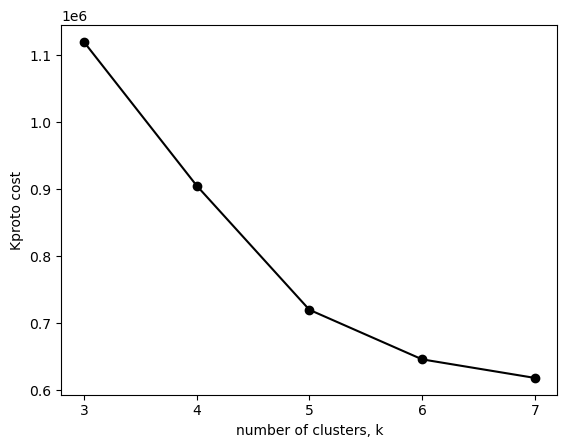

In [102]:
plt.plot(n_clusters, costs, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('Kproto cost')
plt.xticks(n_clusters)
plt.show()

In [ ]:
costs_knee = KneeLocator(
        range(3,8), 
        costs, 
        S=0.1, curve="convex", direction="decreasing")

K_cost = costs_knee.elbow
print("Elbow at k =", f'{K_cost:.0f} clusters')

### Create model

In [108]:
dfp2 = big_df.copy()
clusters = clusters_assigned[K_cost-3]
dfp2.insert(0, 'CLUSTER', clusters)

In [109]:
dfp2.head()

,CLUSTER,CUST_NUM,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,...,DIGITAL_CHANNEL,DIGITAL_TRAN_TYPE,INCOMING_MEAN,INCOMING_COUNT,INCOMING_BPI_ACCT_TYPE,INCOMING_SRC_BANK_NAME,OUTGOING_MEAN,OUTGOING_COUNT,OUTGOING_CHANNEL,OUTGOING_RCV_BANK_NAME
0,0,11712.654012,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.833333,N,DIGITAL,ALLOWANCE,...,MOBILE,BILLS PAYMENT,2619.191451,5.0,SA,HUMAN,1626.116225,17.0,MOBILE,HUMAN
1,1,436.605085,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,21.0,4.250000,N,NO_DATA,SALARY,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
2,0,921.989154,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,23.0,2.000000,N,TRADITIONAL,ALLOWANCE,...,WEB,E-WALLET,3349.209339,4.0,SA,HUMAN,0.000000,0.0,NO_DATA,NO_DATA
3,2,1119.634762,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),LOW,13.0,5.583333,N,TRADITIONAL,ALLOWANCE,...,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA,0.000000,0.0,NO_DATA,NO_DATA
4,3,1709.755538,BENGUET,CORDILLERA ADMINISTRATIVE REGION (CAR),NO_DATA,20.0,1.250000,N,DIGITAL,SALARY,...,WEB,E-WALLET,3886.745466,4.0,SA,CAT,0.000000,0.0,NO_DATA,NO_DATA


In [115]:
dfp2.to_csv('dfp_kprototypes.csv', index=False)

### Visualize

In [112]:
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(dfp_combined)

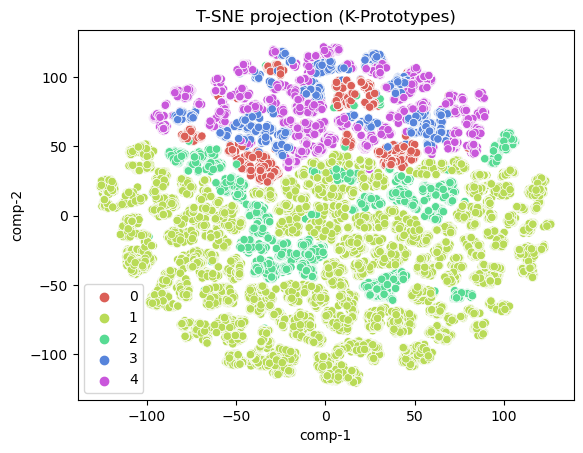

In [113]:
import seaborn as sns

dfp_kproto = pd.DataFrame()
dfp_kproto['CLUSTER'] = dfp2['CLUSTER']
dfp_kproto['comp-1'] = transformed[:,0]
dfp_kproto['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kproto.CLUSTER.tolist(),
                palette=sns.color_palette('hls',5),
                data=dfp_kproto).set(title="T-SNE projection (K-Prototypes)")

plt.show()

In [114]:
plt.savefig('T-SNE_K-Prototypes.png')

<Figure size 640x480 with 0 Axes>

# K-Mediods via Gower Similarity

In [130]:
from sklearn_extra.cluster import KMedoids
import gower

dfp_combined2 = dfp_combined.copy()

cat_lst = [True if i in df_cat_cols else False for i in range(len(dfp_combined.columns))]
D = gower.gower_matrix(data_x=dfp_combined2, cat_features=cat_lst)

KeyboardInterrupt: 

### Find optimal cluster number

Try 3 to 7 clusters

In [ ]:
ks = range(3,8)
intertias_m = []
for k in ks:
    model = KMedoids(n_clusters=k, metric='precomputed', method='pam')
    model.fit(D)
    inertias_m.append(model.inertia_)
    print(f'Done with {k}!')

In [ ]:
plt.plot(ks, inertias_m, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Get the elbow point (best number of clusters)

In [ ]:
from kneed import KneeLocator

# inertia scores: confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concavem will detect knees
inertia_knee = KneeLocator(
        range(3,8), 
        inertias_m, 
        S=0.1, curve="convex", direction="decreasing")

K_inertia = inertia_knee.elbow   
print("Elbow at k =", f'{K_inertia:.0f} clusters')

Get array of cluster labels and insert as new column into the original dataframe

In [ ]:
dfp3 = big_df.copy()

model = KMedoids(n_clusters=K_inertia, metric='precomputed', method='pam')
clusters = model.fit_predict(D)
dfp3.insert(0, 'CLUSTER', clusters)

dfp3.head()

In [ ]:
dfp3.to_csv('dfp_kmedoids.csv')

Visualize

In [ ]:
# tsne = TSNE(n_components=2)
# transformed = tsne.fit_transform(dfp_combined)

In [ ]:
import seaborn as sns

dfp_kmedoids = pd.DataFrame()
dfp_kmedoids['CLUSTER'] = dfp3['CLUSTER']
dfp_kmedoids['comp-1'] = transformed[:,0]
dfp_kmedoids['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_kmedoids.CLUSTER.tolist(),
                palette=sns.color_palette('hls'),
                data=dfp_kmedoids).set(title="T-SNE projection (K-Medoids)")

plt.savefig('T-SNE_K-Medoids.png')
plt.show()

### 4. Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

In [ ]:
from sklearn.cluster import HDBSCAN

In [ ]:
dfp4 = big_df.copy()

model = HDBSCAN(min_cluster_size=4, metric='precomputed', n_jobs=-1)
clusters = model.fit_predict(D)
dfp4.insert(0, 'CLUSTER', clusters)

dfp4.head()

In [ ]:
dfp4.to_csv('dfp_HDBSCAN.csv')

In [ ]:
import seaborn as sns

dfp_hdbscan = pd.DataFrame()
dfp_hdbscan['CLUSTER'] = dfp4['CLUSTER']
dfp_hdbscan['comp-1'] = transformed[:,0]
dfp_hdbscan['comp-2'] = transformed[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=dfp_hdbscan.CLUSTER.tolist(),
                palette=sns.color_palette('hls'),
                data=dfp_hdbscan).set(title="T-SNE projection (HDBSCAN)")

plt.savefig('T-SNE_HDBSCAN.png')
plt.show()

### Get K-Medoids silhouette score

In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score

In [2]:
kmedoids = pd.read_csv('dfp_kmedoids.csv')

In [20]:
silhouette_score(dfp_pca, kmedoids.CLUSTER)

-0.02640552624325726